<a href="https://colab.research.google.com/github/sjhd1109/project/blob/main/20210916_modeling(%EA%B3%B5%EB%AA%A8%EC%A0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df =pd.read_table('/content/drive/MyDrive/data_final.csv',sep=',', encoding='euc-kr')

In [ ]:
# 데이터 값 실수. 소수점 f째자리까지 표시
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
df.describe()

,upjong,cc,seg,KK068,KK069,KK057,KK058,KK137,KK081,KK083,KK043,KK053,KK039,KK030,KK031,KK033,KK025,budo,KK068_E,KK069_E,KK057_E,KK058_E,KK137_E,KK081_E,KK083_E,KK043_E,KK053_E,KK030_E,KK039_E,KK031_E,KK033_E,KK025_E,KK068_O,KK069_O,KK057_O,KK058_O,KK137_O,KK081_O,KK083_O,KK043_O,KK053_O,KK030_O,KK039_O,KK031_O,KK033_O,KK025_O
count,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000
mean,3.1857,0.0144,2.9941,453.0961,377.5319,218.4970,130.4536,2.2028,262983.8009,37.1806,4.4742,8.3533,23.1227,28.1859,9.5398,14.5102,21.4368,0.0082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0256,0.0000,0.0051,0.0048,0.0043,0.0701,0.0665,0.0396,0.0386,0.0125,0.1212,0.1695,0.0549,0.0227,0.0404,0.0361,0.0701,0.0701,0.0385
std,1.3652,0.1191,1.0274,604.0957,524.5674,305.7989,190.3324,2.1997,496395.5865,56.1455,9.7443,14.5236,42.3919,77.9331,196.6197,204.2823,47.5096,0.0903,0.0011,0.0011,0.0000,0.0008,0.0000,0.0000,0.0023,0.0000,0.0008,0.1581,0.0000,0.0714,0.0691,0.0657,0.2553,0.2491,0.1950,0.1926,0.1113,0.3264,0.3752,0.2278,0.1488,0.1968,0.1866,0.2554,0.2552,0.1924
min,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-28.2254,-50.3209,-135.7578,-100.0000,-585.9557,-612.7490,-99.9901,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,2.0000,0.0000,2.0000,116.9380,83.5951,39.1094,19.2071,0.8535,11.2065,5.1402,1.5728,1.9897,4.9248,-10.4133,-48.0853,-49.9287,-2.1477,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,3.0000,0.0000,3.0000,204.7564,164.1103,109.2547,57.9211,1.5310,48.9858,9.4715,3.7790,5.4840,13.7414,7.9590,-0.2968,0.1240,8.0324,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,4.0000,0.0000,4.0000,457.4355,383.9884,249.3276,149.2941,2.7288,210000.0000,27.7814,7.2211,12.0174,31.6476,35.6373,50.9783,53.6460,27.8170,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,5.0000,1.0000,4.0000,2277.0453,1990.8605,1369.7264,842.0283,12.5377,1414849.6496,158.5653,37.0536,64.3120,172.6951,302.4086,589.9438,617.7591,193.2378,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
#categorical_columns = df.select_dtypes(include=['int']).astype('category')

In [ ]:
dummy_upjong = pd.get_dummies(df['upjong'], prefix='upjong')
dummy_seg = pd.get_dummies(df['seg'], prefix='seg')
 
continuous_columns = ['KK068', 'KK069','KK057','KK058','KK137', 
            'KK081','KK083', 'KK043','KK053','KK030', 
            'KK039','KK031','KK033', 'KK025']
 
categorical_columns = ['cc',
            'KK068_E', 'KK069_E','KK057_E','KK058_E','KK137_E', 
            'KK081_E','KK083_E', 'KK043_E','KK053_E','KK030_E', 
            'KK039_E','KK031_E','KK033_E', 'KK025_E',
            'KK068_O', 'KK069_O','KK057_O','KK058_O','KK137_O', 
            'KK081_O','KK083_O', 'KK043_O','KK053_O','KK030_O', 
            'KK039_O','KK031_O','KK033_O', 'KK025_O']
 
budo_columns = df['budo']
 
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
 
continuous_columns = df.select_dtypes(include=['float64']).columns.values.tolist()
credit_columns_cont = df[continuous_columns]
credit_columns_cont = mean_norm(credit_columns_cont)
 
categorical_columns = df.select_dtypes(include=['int']).columns.values.tolist()
credit_columns_cat = df[categorical_columns]
 
credit_data_new = pd.concat([dummy_upjong,dummy_seg,credit_columns_cont,credit_columns_cat],axis=1)

In [ ]:
c = ['upjong','seg']
credit_data_total = credit_data_new.drop(c, axis=1)

In [ ]:
credit_data_total #더미변수화 넣은 데이터+정규화

,upjong_1,upjong_2,upjong_3,upjong_4,upjong_5,seg_1,seg_2,seg_3,seg_4,KK068,KK069,KK057,KK058,KK137,KK081,KK083,KK043,KK053,KK039,KK030,KK031,KK033,KK025,cc,budo,KK068_E,KK069_E,KK057_E,KK058_E,KK137_E,KK081_E,KK083_E,KK043_E,KK053_E,KK030_E,KK039_E,KK031_E,KK033_E,KK025_E,KK068_O,KK069_O,KK057_O,KK058_O,KK137_O,KK081_O,KK083_O,KK043_O,KK053_O,KK030_O,KK039_O,KK031_O,KK033_O,KK025_O
0,0,1,0,0,0,1,0,0,0,-0.6611,-0.6366,1.7045,2.5711,-0.7486,-0.5298,-0.5469,-3.3558,-4.0399,-3.7479,-0.1759,2.9519,2.0785,-1.0180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
1,0,1,0,0,0,1,0,0,0,-0.5122,-0.4691,-0.4963,-0.3875,-0.8809,-0.5298,-0.5987,-3.3558,-2.5391,-2.4567,-1.0918,0.4755,-0.4368,-0.1528,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,-0.6121,-0.6554,-0.2397,-0.0124,-0.4158,-0.5298,-0.5236,-0.6760,-0.7260,-0.7307,-0.0553,-0.3676,-2.8234,0.8970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,-0.6530,-0.6759,0.0186,0.3730,-0.4857,-0.5298,-0.4984,-1.1050,-1.1032,-1.0112,-0.3315,-1.6144,0.9319,-0.7230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,-0.7026,-0.6855,0.5917,1.2526,-0.3973,-0.5298,-0.4396,-1.4578,-1.5040,-1.7343,-0.3012,1.6600,0.2320,-0.6187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704790,0,0,0,1,0,0,0,0,1,-0.4321,-0.4884,-0.4722,-0.3012,0.9652,-0.5298,-0.4525,0.1045,1.0650,0.2869,-0.0371,0.0819,0.2827,-0.4621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704791,0,0,0,1,0,0,0,0,1,-0.4631,-0.5026,-0.4566,-0.2778,0.7776,-0.5298,-0.5109,-0.0102,0.7708,0.1660,-0.6150,-0.1241,-0.2476,-0.9164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704792,0,0,0,1,0,0,0,0,1,-0.4406,-0.3855,-0.4338,-0.2386,1.2023,-0.5297,-0.4533,0.1103,0.8899,0.6172,0.2471,0.1821,0.3550,1.0608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704793,0,0,0,1,0,0,0,0,1,-0.3361,-0.2430,-0.5321,-0.3950,0.9400,-0.5294,-0.4621,0.1375,0.9479,0.4367,-0.0163,0.1773,0.0904,0.1361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
credit_data_total.describe()

,upjong_1,upjong_2,upjong_3,upjong_4,upjong_5,seg_1,seg_2,seg_3,seg_4,KK068,KK069,KK057,KK058,KK137,KK081,KK083,KK043,KK053,KK039,KK030,KK031,KK033,KK025,cc,budo,KK068_E,KK069_E,KK057_E,KK058_E,KK137_E,KK081_E,KK083_E,KK043_E,KK053_E,KK030_E,KK039_E,KK031_E,KK033_E,KK025_E,KK068_O,KK069_O,KK057_O,KK058_O,KK137_O,KK081_O,KK083_O,KK043_O,KK053_O,KK030_O,KK039_O,KK031_O,KK033_O,KK025_O
count,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000
mean,0.1167,0.2671,0.1691,0.2080,0.2391,0.1110,0.1979,0.2772,0.4139,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0144,0.0082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0256,0.0000,0.0051,0.0048,0.0043,0.0701,0.0665,0.0396,0.0386,0.0125,0.1212,0.1695,0.0549,0.0227,0.0404,0.0361,0.0701,0.0701,0.0385
std,0.3211,0.4424,0.3748,0.4059,0.4265,0.3141,0.3984,0.4476,0.4925,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1191,0.0903,0.0011,0.0011,0.0000,0.0008,0.0000,0.0000,0.0023,0.0000,0.0008,0.1581,0.0000,0.0714,0.0691,0.0657,0.2553,0.2491,0.1950,0.1926,0.1113,0.3264,0.3752,0.2278,0.1488,0.1968,0.1866,0.2554,0.2552,0.1924
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.7500,-0.7197,-0.7145,-0.6854,-1.0014,-0.5298,-0.6622,-3.3558,-4.0399,-3.7479,-1.6448,-3.0287,-3.0706,-2.5558,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.5565,-0.5603,-0.5866,-0.5845,-0.6134,-0.5298,-0.5707,-0.2978,-0.4382,-0.4293,-0.4953,-0.2931,-0.3154,-0.4964,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4111,-0.4069,-0.3572,-0.3811,-0.3054,-0.5297,-0.4935,-0.0713,-0.1976,-0.2213,-0.2595,-0.0500,-0.0704,-0.2821,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0072,0.0123,0.1008,0.0990,0.2391,-0.1067,-0.1674,0.2819,0.2523,0.2011,0.0956,0.2108,0.1916,0.1343,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.0193,3.0755,3.7647,3.7386,4.6984,2.3205,2.1620,3.3434,3.8530,3.5283,3.5187,2.9519,2.9530,3.6161,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print(credit_data_total['upjong_1'].sum())
print(credit_data_total['upjong_2'].sum())
print(credit_data_total['upjong_3'].sum()) 
print(credit_data_total['upjong_4'].sum())
print(credit_data_total['upjong_5'].sum())

198973
455343
288228
354658
407593


#################
# data set 나누기

In [ ]:
# 타겟변수, 예측변수 나누기 (x, y)
TargetVariable='budo'
Predictors=[ 'upjong_1',    'upjong_2', 'upjong_3', 'upjong_4', 'upjong_5', 'seg_1',    'seg_2',    'seg_3',    'seg_4', 'cc',
            'KK068', 'KK069','KK057','KK058','KK137', 
            'KK081','KK083', 'KK043','KK053','KK030', 
            'KK039','KK031','KK033', 'KK025',
            'KK068_E', 'KK069_E','KK057_E','KK058_E','KK137_E', 
            'KK081_E','KK083_E', 'KK043_E','KK053_E','KK030_E', 
            'KK039_E','KK031_E','KK033_E', 'KK025_E',
            'KK068_O', 'KK069_O','KK057_O','KK058_O','KK137_O', 
            'KK081_O','KK083_O', 'KK043_O','KK053_O','KK030_O', 
            'KK039_O','KK031_O','KK033_O', 'KK025_O']
 
 
 
x=credit_data_total[Predictors].values
y=credit_data_total[TargetVariable].values

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1597)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=1597)

In [ ]:
x_train.shape

(1022877, 52)

In [ ]:
y_test.shape

(340959,)

In [ ]:
print(len(y_test)/2)
print(len(y_train)/6)
print(len(y_val)/2)



170479.5
170479.5
170479.5


In [ ]:
Y_train = pd.DataFrame(y_train)
Y_test = pd.DataFrame(y_test)
Y_val = pd.DataFrame(y_val)

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)
X_val = pd.DataFrame(x_val)

print('학습 데이터 레이블 값 비율')
print(Y_train.value_counts()/Y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(Y_test.value_counts()/Y_test.shape[0] * 100)
print('Val 데이터 레이블 값 비율')
print(Y_val.value_counts()/Y_val.shape[0] * 100)

학습 데이터 레이블 값 비율
0   99.1775
1    0.8225
dtype: float64
테스트 데이터 레이블 값 비율
0   99.1682
1    0.8318
dtype: float64
Val 데이터 레이블 값 비율
0   99.1893
1    0.8107
dtype: float64


#로지스틱


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                 3.071e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:35:36   Log-Likelihood:             1.4321e+06
No. Observations:             1022877   AIC:                        -2.864e+06
Df Residuals:                 1022833   BIC:                        -2.864e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+09   1.63e+10      0.066      0.9

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차행렬
[[336835   1288]
 [   626   2210]]
정확도: 0.9944, 정밀도: 0.6318, 재현율: 0.7793, F1: 0.6978, AUC:0.8877


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.888


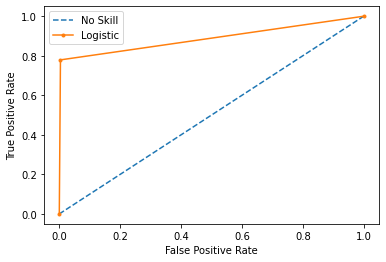

In [ ]:
#roc 커브
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
#lr_probs = clf.predict_proba(x_test)
#lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_pred)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# 1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.metrics import Metric
 
 
model_baseline = Sequential()
model_baseline.add(Dense(54, activation ='relu', input_shape=(52 ,)))
model_baseline.add(Dense(27, activation ='relu'))
model_baseline.add(Dense(9, activation ='relu'))
model_baseline.add(Dense(1, activation ='sigmoid'))

In [ ]:
model_baseline.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
             metrics=[tf.keras.metrics.AUC()]
)

In [ ]:
model_baseline.summary()

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
model_baseline.fit(x_train, y_train, batch_size=12800, callbacks=[history],
               epochs=10, validation_data=(x_val, y_val))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy(정확도): {:.4f}'.format(accuracy))
print('precision(정밀도): {:.4f}'.format(precision))
print('recall(재현율): {:.4f}'.format(recall))
print('f1score: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(roc_auc))

Accuracy(정확도): 0.9917
precision(정밀도): 0.0000
recall(재현율): 0.0000
f1score: 0.0000
AUC: 0.5000


#DNN !

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.metrics import Metric
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

In [ ]:
#DNN (3개 layer로 해보기)
 
n_inputs = x_train.shape[1]
n_output = 2
 
with tf.device("/GPU:0") :
  model_nn = tf.keras.Sequential([
  layers.Dense(64, input_shape=(n_inputs, ), activation='sigmoid'),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(n_output, activation='softmax'), #sigmoid
])
model_nn.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                3392      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 34        
Total params: 6,034
Trainable params: 6,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train
hist=model_nn.fit(x_train, y_train, batch_size=1000, epochs=10, validation_data=(x_val, y_val))
 
# predict
y_pred = model_nn.predict(x_test)
y_real = y_test

Epoch 1/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0798 - accuracy: 0.9746 - val_loss: 0.0406 - val_accuracy: 0.9919
Epoch 2/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0114 - val_accuracy: 0.9941
Epoch 3/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.9942 - val_loss: 0.0101 - val_accuracy: 0.9944
Epoch 4/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.9944 - val_loss: 0.0098 - val_accuracy: 0.9944
Epoch 5/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.9944 - val_loss: 0.0098 - val_accuracy: 0.9943
Epoch 6/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0098 - accuracy: 0.9944 - val_loss: 0.0097 - val_accuracy: 0.9945
Epoch 7/10
1023/1023 [==============================] - 3s 3ms/step - loss: 0.0097 - accuracy: 0.9944 - val_loss: 0.0097 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

y_pred= y_pred.argmax(axis=1)

accuracy = round(sum(y_pred == y_real) / len(y_pred), 4)
print('Accuracy : ', accuracy)
print(classification_report(y_real, y_pred))

Accuracy :  0.9944
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    338123
           1       0.62      0.84      0.72      2836

    accuracy                           0.99    340959
   macro avg       0.81      0.92      0.86    340959
weighted avg       1.00      0.99      0.99    340959



In [ ]:
get_clf_eval(y_test, y_pred)

오차행렬
[[336672   1451]
 [   450   2386]]
정확도: 0.9944, 정밀도: 0.6218, 재현율: 0.8413, F1: 0.7151, AUC:0.9185


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.869


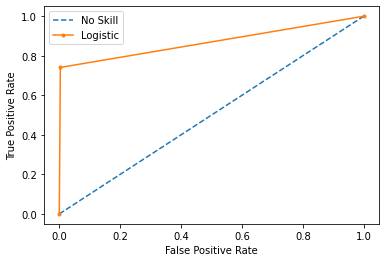

In [ ]:
#roc커브
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
#lr_probs = clf.predict_proba(x_test)
#lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()